In [16]:
import sklearn
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import SGDClassifier, LogisticRegression
import numpy as np
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [11]:
def list_dir():      
    Active = []
    Decoy = []
    active_list=sorted(os.listdir("/home/sabs-r3/Desktop/Compounds/Active"))
    decoy_list = sorted(os.listdir("/home/sabs-r3/Desktop/Compounds/Decoys"))
    #print(active_list)
    for i in active_list:
        Active.append(i)
    for i in decoy_list:
        Decoy.append(i)      
    return Active, Decoy

In [12]:
def combined_data(index):
    if index in range(0,10):
        active_list = list_dir()[0]
        os.chdir('/home/sabs-r3/Desktop/Compounds/Active')
        active_data = pd.read_csv(active_list[index])
        active_data["Activity"] = [1]*len(active_data.index)
        os.chdir('..')
    
        decoy_list = list_dir()[1]
        os.chdir('/home/sabs-r3/Desktop/Compounds//Decoys')
        decoy_data = pd.read_csv(decoy_list[index])
        decoy_data["Activity"] = [0]*len(decoy_data.index)
        os.chdir('..')
        data = pd.concat([active_data, decoy_data])
    else:
        print('Enter an index between 0 and 9')
    return data

In [13]:
#data = combined_data(0).loc[(combined_data(0).sum(axis=1) != 0), (combined_data(0).sum(axis=0) != 0)]
data = combined_data(0)._get_numeric_data() #leave out any none-numerical types
data = data.loc[:, (data != data.iloc[0]).any()] # leave out any zero columns
# extract data & split into training & testing sets
data = combined_data(0).to_numpy() #modify this for other data!

AUC using absolute classification(1 or 0)


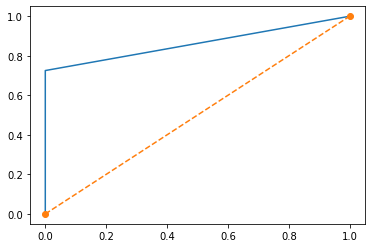

0.8626373626373627
[[6305    0]
 [  25   66]]
AUC using probabilities


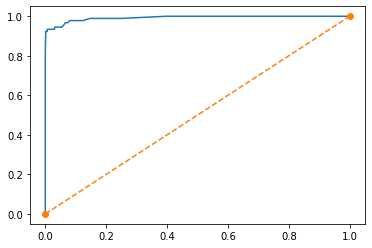

0.9922771914841702


In [14]:
scaler = StandardScaler()
scaler.fit(data[:, 1:])
scaler.transform(data[:, 1:])
y = data[:,-1]
y = y.astype('int')
X = data[:, 1:-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_forest_classifier = RandomForestClassifier(random_state=0, n_estimators=500)
random_forest_classifier.fit(X_train, y_train)
y_pred = random_forest_classifier.predict(X_test)

fpr, tpr, _ = roc_curve(y_test, y_pred)
print('AUC using absolute classification(1 or 0)')
plt.plot(fpr, tpr)
plt.plot([0,1],[0,1], 'o--')
plt.show()
print(auc(fpr, tpr))
print(confusion_matrix(y_test, y_pred))


y_score = random_forest_classifier.predict_proba(X_test)[:,1]
prob_auc = roc_auc_score(y_test, y_score)
prob_fpr, prob_tpr, _ = roc_curve(y_test, y_score)
print('AUC using probabilities')
plt.plot(prob_fpr, prob_tpr)
plt.plot([0,1],[0,1], 'o--')
plt.show()
print(prob_auc)

/home/sabs-r3/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


AUC using probabilities


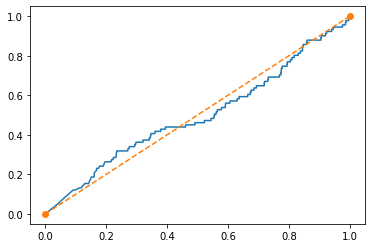

0.49674948366463034


In [26]:
log_reg = LogisticRegression(max_iter = 500).fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
log_reg.score(X_test, y_test) #Returns mean accuracy
y_score = log_reg.predict_proba(X_test)[:,1]
prob_auc = roc_auc_score(y_test, y_score)
prob_fpr, prob_tpr, _ = roc_curve(y_test, y_score)
print('AUC using probabilities')
plt.plot(prob_fpr, prob_tpr)
plt.plot([0,1],[0,1], 'o--')
plt.show()
print(prob_auc)
